Import all necessary packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go

In [29]:
sns.set_style('darkgrid')

In [30]:

import warnings
warnings.filterwarnings("ignore")

In [31]:
data = pd.read_csv("Virat_Kohli_ODI.csv")
data.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


In [32]:
data.shape 

(132, 12)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        132 non-null    object
 1   Mins        132 non-null    object
 2   BF          132 non-null    int64 
 3   4s          132 non-null    int64 
 4   6s          132 non-null    int64 
 5   SR          132 non-null    object
 6   Pos         132 non-null    int64 
 7   Dismissal   132 non-null    object
 8   Inns        132 non-null    int64 
 9   Opposition  132 non-null    object
 10  Ground      132 non-null    object
 11  Start Date  132 non-null    object
dtypes: int64(5), object(7)
memory usage: 12.5+ KB


In [34]:
data.isna().sum()

Runs          0
Mins          0
BF            0
4s            0
6s            0
SR            0
Pos           0
Dismissal     0
Inns          0
Opposition    0
Ground        0
Start Date    0
dtype: int64

Data Cleaning

In [35]:
data.Runs = data.Runs.map(lambda x : x.replace("*",""))

In [36]:

temp_df = data[data.Mins!="-"]
temp_df.Mins = temp_df.Mins.astype(int)

mean = sum(temp_df.Mins)/len(temp_df.Mins)

# Replacing "-" with mean value
data.Mins = data.Mins.apply(lambda x : int(mean) if x=="-" else x)

# Changing the Data type
data.Mins = data.Mins.astype(int)

In [37]:
# Replacing "-" with mean value

temp_df = data[data.SR!="-"]
temp_df.SR = temp_df.SR.astype(float)

mean = sum(temp_df.SR)/len(temp_df.SR)
mean

data.SR = data.SR.apply(lambda x : mean if x=="-" else x)

data.SR = data.SR.astype(float)

In [38]:
data.head(20)

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.540000,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.220000,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.780000,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.810000,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.390000,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08
5,2,6,2,0,0,100.000000,7,not out,1,v Sri Lanka,Colombo (RPS),14-Sep-09
6,30,53,41,3,0,73.170000,4,caught,2,v Australia,Vadodara,25-Oct-09
7,10,32,16,1,0,62.500000,3,caught,2,v Australia,Mohali,02-Nov-09
8,27,20,19,4,0,142.100000,7,bowled,1,v Sri Lanka,Rajkot,15-Dec-09
9,54,93,65,7,0,83.070000,4,lbw,1,v Sri Lanka,Nagpur,18-Dec-09


In [39]:
data.Runs = data.Runs.astype(int)
data['Start Date'] = pd.to_datetime(data['Start Date'])

In [40]:
data["Year"] = data["Start Date"].dt.year
data["Month"] = data["Start Date"].dt.month

In [41]:
data.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Year,Month
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,2008-08-18,2008,8
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,2008-08-20,2008,8
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),2008-08-24,2008,8
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),2008-08-27,2008,8
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),2008-08-29,2008,8


 Total runs scored by Virat Kohli From Year 2008-2017 in ODI Format

In [42]:
print(" total runs scored by Virat kohli From Year 2008-2017 in ODI's is",sum(data.Runs))

 total runs scored by Virat kohli From Year 2008-2017 in ODI's is 6184


Runs Scored Each Year by Virat Kohli

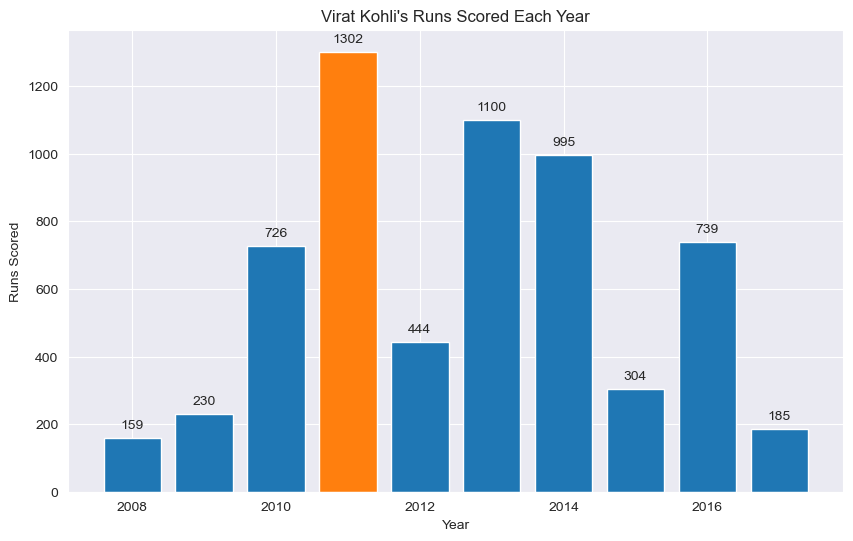

In [43]:
# Group data by year and calculate total runs
yearly_runs = data.groupby('Year')['Runs'].sum()

# Determine the year with the highest runs
highest_year = yearly_runs.idxmax()
highest_runs = yearly_runs.max()

# Set the figure size (adjust as needed)
plt.figure(figsize=(10, 6))

# Create a bar chart with highlighting the year with the highest runs
colors = ['#1f77b4' if year != highest_year else '#ff7f0e' for year in yearly_runs.index]
plt.bar(yearly_runs.index, yearly_runs.values, color=colors)

# Add data labels to each bar
for i, runs in enumerate(yearly_runs.values):
    plt.text(yearly_runs.index[i], runs + 20, str(runs), ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Runs Scored')
plt.title('Virat Kohli\'s Runs Scored Each Year')

# Display the chart
plt.show()






In [44]:
matches = data.index
fig = px.line(data, x=matches, y="Runs", title="Runs Scored by Virat Kohli Per Innings", labels={"index":"Innings"})
fig.show()

In [45]:
data["Pos"] = data["Pos"].map({3.0: "Batting At 3", 4.0: "Batting At 4", 2.0: "Batting At 2", 
                               1.0: "Batting At 1", 7.0:"Batting At 7", 5.0:"Batting At 5", 
                               6.0: "Batting At 6"})

No. of Matches played by virat kohli at different batting positions

In [46]:
pos = data.Pos.value_counts()

colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen',"pink", "blue","cyan"]
label = pos.index
counts = pos.values

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])

fig.update_layout(title_text="Number of Matches at Different Batting Position")

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='black', width=2)))
fig.show()

Runs scored by virat kohli at different batting positions

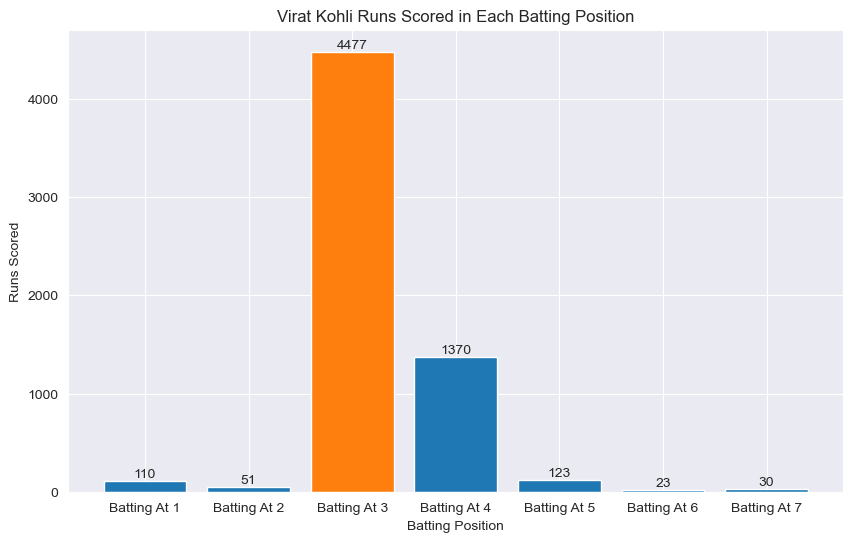

In [47]:
position_runs = data.groupby('Pos')['Runs'].sum()

highest_position = position_runs.idxmax()
highest_runs = position_runs.max()

plt.figure(figsize=(10, 6))  # Width: 10 inches, Height: 6 inches



# Create a bar chart
colors = ['#1f77b4' if pos != highest_position else '#ff7f0e' for pos in position_runs.index]
plt.bar(position_runs.index, position_runs.values, color=colors)


# Add data labels to each bar
for i, runs in enumerate(position_runs.values):
    plt.text(position_runs.index[i], runs + 5, str(runs), ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Batting Position')
plt.ylabel('Runs Scored')
plt.title('Virat Kohli Runs Scored in Each Batting Position')

# Display the chart
plt.show()

Total Number of 4s and 6s Scored at Different Batting Position

In [48]:
value = data.groupby("Pos")["4s","6s"].sum()


fig = px.bar(data_frame=value, x=["4s","6s"], y=value.index, title="Total Number of 4s and 6s Scored at Different Batting Position",
             labels={"Pos":"Batting Position", "value":"Total Runs"}, text_auto=True)



fig.update_traces(marker=dict(line=dict(color='black', width=2)))
fig.show()

Innings played by virat kohli against each team

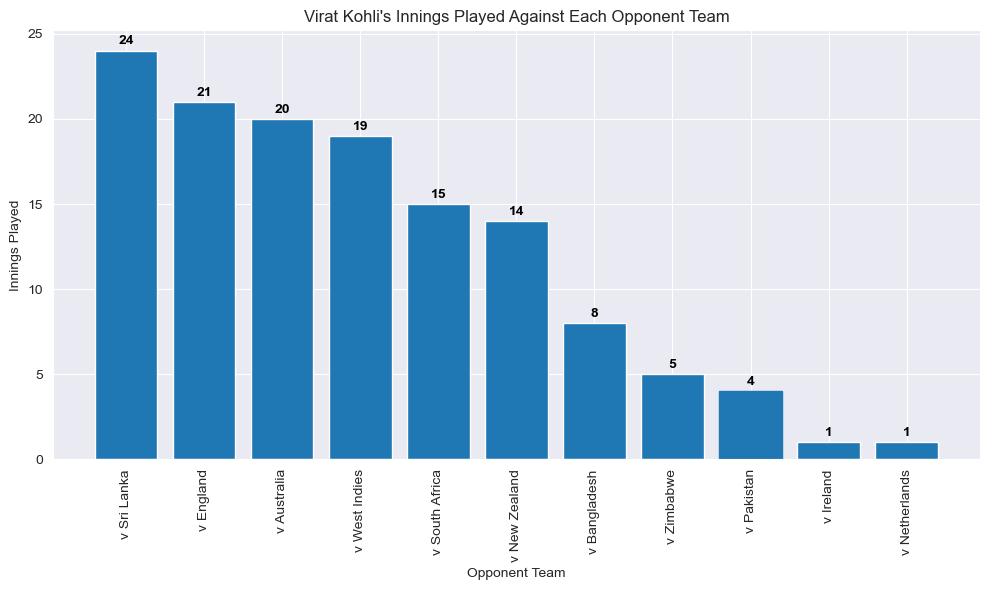

In [49]:

innings_per_opponent = data.groupby('Opposition')['Inns'].count().reset_index()

# Rename columns
innings_per_opponent.columns = ['Opposition', 'Inns']

# Sort by innings played in descending order
innings_per_opponent = innings_per_opponent.sort_values(by='Inns', ascending=False)

# Create a bar graph
plt.figure(figsize=(10, 6))

bars = plt.bar(innings_per_opponent['Opposition'], innings_per_opponent['Inns'], color='#1f77b4')

max_value_index = innings_per_opponent['Inns'].idxmax()

# Highlight the bar with the maximum value
bars[max_value_index].set_color('#1f77b4')

# Add data labels above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, int(yval), ha='center', va='bottom', color='black', fontweight='bold')

plt.xlabel('Opponent Team')
plt.ylabel('Innings Played')
plt.title('Virat Kohli\'s Innings Played Against Each Opponent Team')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the bar graph
plt.show()


Centuries scored by virat kohli against each team

In [55]:
df = data[data.Runs>=100]

value = df.Opposition.value_counts().values
label = df.Opposition.value_counts().index

fig = px.bar(data_frame=df, y=label, x=value, title="Number of time Virat Kohli has Scored Century", 
       labels={"x":"Innings", "y":"Opposition"}, color=label)

fig.update_traces(marker=dict(line=dict(color='black', width=2)))
fig.show()

Reason for Dismissal of Virat Kohli

In [51]:
pos = data.Dismissal.value_counts()

colors = ['pink', 'mediumturquoise', 'darkorange', 'lightgreen','gold','blue','red']
label = pos.index
counts = pos.values

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])

fig.update_layout(title_text="Reason for Dismissal of Virat Kohli")

fig.update_traces(hoverinfo='percent', textinfo='value+label', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='black', width=2)))
fig.show()

Number of times virat has scored 0 runs and the reason behind his dismissal

In [58]:
df = data[data.Runs<1]

pos = df.Dismissal.value_counts()

colors = ['red', 'blue', 'darkorange', 'lightgreen']
label = pos.index
counts = pos.values

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])

fig.update_layout(title_text="Number of times he has scored 0 runs and the reason behind his dismissal")

fig.update_traces(hoverinfo='percent', textinfo='value+label', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='black', width=2)))
fig.show()